# TITLE : MALARIA CLASSIFICATON USING CONVOLUTIONAL NEURAL NETWORK
COMPETITION : DSN AI FOR HEALTH
TEAM : TEAM WAKANDA
TEAM LEAD : OMONIYI TEMIDAYO ANDREW
PHONE NUMBER : 08166220117
EMAIL: omoniyiandrewai@gmail.com, kiddojazz@gmail.com

In [4]:
#Importing necessary libraries
import pandas as pd 
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
#print(os.listdir("/chest_xray/chest_xray"))
print(os.listdir("C:/Users/AndyJazz/Documents/PYTHON WORK AI/Maleria_Cell/dsn_malaria/cell_images"))

['Parasitized', 'test', 'train', 'Uninfected', 'valid']


In [5]:
#DATA VISUALIZTION

In [6]:
from IPython.display import Image

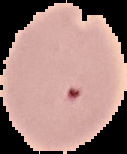

In [7]:
#To see the Currency out in display and set specific width and height
Image(filename='C:/Users/AndyJazz/Documents/PYTHON WORK AI/Maleria_Cell/dsn_malaria/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_180.png', width=400, height=200)
#PARASITIZED IMAGE

# STEP 1

Pefrorming different data pre-processing technique on the image
dataset.
- Segmentation
- RGB2GRAY
- Histogram

In [8]:
img = cv2.imread('cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_180.png')
retval,threshold = cv2.threshold(img, 12, 255, cv2.THRESH_BINARY)
grayscale =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
retval2,threshold2 = cv2.threshold(grayscale, 12, 255, cv2.THRESH_BINARY)
cv2.imshow('pic', img)
cv2.imshow('treshold', threshold)
cv2.imshow('treshold', threshold2)
cv2.waitKey(0)
cv2.destroyAllWindows()

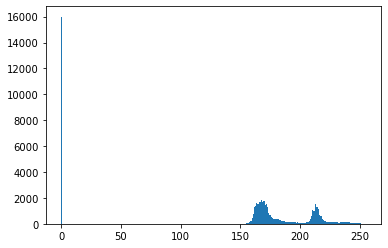

In [9]:
from skimage import io
import matplotlib.pyplot as plt
image = io.imread('cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_180.png')
ax = plt.hist(image.ravel(), bins = 256)
plt.show()

In [10]:
#Libraries needed
import keras 
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as k
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

#Importing all necessary Libraries

import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import keras 
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [11]:
#Setting the image size and batch size
batch_size = 48 #is the standard batch size
img_width, img_height = 224, 224
#num_classes = 64

In [12]:
#Defining the directory of the image to be used
train_path = 'C:/Users/AndyJazz/Documents/PYTHON WORK AI/Maleria_Cell/dsn_malaria/cell_images/train'
valid_path = 'C:/Users/AndyJazz/Documents/PYTHON WORK AI/Maleria_Cell/dsn_malaria/cell_images/valid'
test_path = 'C:/Users/AndyJazz/Documents/PYTHON WORK AI/Maleria_Cell/dsn_malaria/cell_images/test'

In [13]:
'''#Data Augmentation:
datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    validation_split=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2
     
)

#valid_datagen = ImageDataGenerator(rescale=1. / 255)

#test_datagen = ImageDataGenerator(rescale=1. / 255)'''

'#Data Augmentation:\ndatagen = ImageDataGenerator(\n    rescale=1. / 255,\n    shear_range=0.2,\n    zoom_range=0.2,\n    horizontal_flip=True,\n    rotation_range=20,\n    validation_split=0.1,\n    width_shift_range=0.2,\n    height_shift_range=0.2\n     \n)\n\n#valid_datagen = ImageDataGenerator(rescale=1. / 255)\n\n#test_datagen = ImageDataGenerator(rescale=1. / 255)'

In [14]:
'''train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    #color_mode='grayscale',
    class_mode = 'binary',
    shuffle = True) #categorical



validation_generator = datagen.flow_from_directory(
    valid_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    #color_mode='grayscale', # this to indicated the image is a grayscale image
    class_mode= 'binary',
    shuffle = True
)
'''

"train_generator = datagen.flow_from_directory(\n    train_path,\n    target_size=(img_width, img_height),\n    batch_size=batch_size,\n    #color_mode='grayscale',\n    class_mode = 'binary',\n    shuffle = True) #categorical\n\n\n\nvalidation_generator = datagen.flow_from_directory(\n    valid_path,\n    target_size=(img_width, img_height),\n    batch_size=batch_size,\n    #color_mode='grayscale', # this to indicated the image is a grayscale image\n    class_mode= 'binary',\n    shuffle = True\n)\n"

In [15]:
'''test_datagen = ImageDataGenerator(rescale=1. / 255)'''

'test_datagen = ImageDataGenerator(rescale=1. / 255)'

In [16]:
'''test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    #color_mode='grayscale', # this to indicated the image is a grayscale image
    class_mode= 'binary',
    shuffle = True
)'''

"test_generator = test_datagen.flow_from_directory(\n    test_path,\n    target_size=(img_width, img_height),\n    batch_size=batch_size,\n    #color_mode='grayscale', # this to indicated the image is a grayscale image\n    class_mode= 'binary',\n    shuffle = True\n)"

In [17]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path, target_size=(224,224),batch_size=10, shuffle=True)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path, target_size=(224,224),batch_size=10, shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path, target_size=(224,224),batch_size=10, shuffle=False)

Found 22048 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.
Found 2754 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


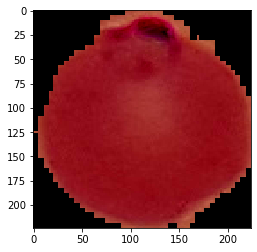

In [19]:
sample = train_batches.next();
plt.imshow(sample[0][0])
train_batches.reset()

# DEFINE MODEL

In [20]:
# https://keras.io/applications/
# Tp know more about Keras pretrained model follow the official site and read more about it
mobile = keras.applications.mobilenet.MobileNet()

In [21]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [22]:
type(mobile)

keras.engine.training.Model

In [23]:
x = mobile.layers[-6].output # we are going to grab the last 6 output from the mobilenet architecture
predictions = Dense(2, activation='softmax')(x) # we set the output to two FAKE OR REAL
model = Model(inputs=mobile.input, outputs=predictions)

In [24]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [25]:
for layer in model.layers[:-23]: #We are going to change the last 23 layers of the network
    layer.trainabel = False

In [26]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
print('steps_per_epoch={}'.format(int(22048 / batch_size)))
print('validation_steps={}'.format(int(2756 / batch_size)))

steps_per_epoch=459
validation_steps=57


In [29]:
# NOTE: We had to reduce the steps per epoch & validation step due to time it would take to train.

In [28]:
history = model.fit_generator(train_batches, steps_per_epoch=18,
                   validation_data=valid_batches, validation_steps=3, epochs=100, verbose=2) # 100 iteration

Epoch 1/100
 - 122s - loss: 0.7257 - accuracy: 0.6944 - val_loss: 4.6944 - val_accuracy: 0.4000
Epoch 2/100
 - 84s - loss: 0.2696 - accuracy: 0.8833 - val_loss: 4.2911 - val_accuracy: 0.5000
Epoch 3/100
 - 84s - loss: 0.3544 - accuracy: 0.8611 - val_loss: 2.8869 - val_accuracy: 0.4667
Epoch 4/100
 - 87s - loss: 0.2624 - accuracy: 0.9167 - val_loss: 1.7139 - val_accuracy: 0.5333
Epoch 5/100
 - 84s - loss: 0.2682 - accuracy: 0.9278 - val_loss: 0.4016 - val_accuracy: 0.7000
Epoch 6/100
 - 83s - loss: 0.2199 - accuracy: 0.9389 - val_loss: 0.3021 - val_accuracy: 0.8667
Epoch 7/100
 - 86s - loss: 0.3307 - accuracy: 0.8944 - val_loss: 0.0545 - val_accuracy: 0.9333
Epoch 8/100
 - 85s - loss: 0.2265 - accuracy: 0.9111 - val_loss: 0.0327 - val_accuracy: 1.0000
Epoch 9/100
 - 83s - loss: 0.1662 - accuracy: 0.9556 - val_loss: 0.3293 - val_accuracy: 0.9667
Epoch 10/100
 - 85s - loss: 0.2248 - accuracy: 0.9278 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 11/100
 - 86s - loss: 0.1662 - accuracy: 0

Epoch 87/100
 - 85s - loss: 0.2350 - accuracy: 0.9444 - val_loss: 0.0186 - val_accuracy: 1.0000
Epoch 88/100
 - 86s - loss: 0.1287 - accuracy: 0.9556 - val_loss: 0.2110 - val_accuracy: 0.8667
Epoch 89/100
 - 84s - loss: 0.1389 - accuracy: 0.9556 - val_loss: 0.6811 - val_accuracy: 0.9333
Epoch 90/100
 - 84s - loss: 0.1663 - accuracy: 0.9444 - val_loss: 0.3731 - val_accuracy: 0.9333
Epoch 91/100
 - 86s - loss: 0.1102 - accuracy: 0.9611 - val_loss: 0.0547 - val_accuracy: 1.0000
Epoch 92/100
 - 85s - loss: 0.1054 - accuracy: 0.9556 - val_loss: 0.0508 - val_accuracy: 0.9615
Epoch 93/100
 - 83s - loss: 0.1662 - accuracy: 0.9389 - val_loss: 0.1871 - val_accuracy: 0.9000
Epoch 94/100
 - 87s - loss: 0.1905 - accuracy: 0.9333 - val_loss: 0.0179 - val_accuracy: 0.9333
Epoch 95/100
 - 88s - loss: 0.1602 - accuracy: 0.9444 - val_loss: 0.5837 - val_accuracy: 0.9000
Epoch 96/100
 - 86s - loss: 0.0887 - accuracy: 0.9611 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 97/100
 - 84s - loss: 0.1085 - acc

In [30]:
model.save('malaria_model_summit.h5')

In [ ]:
'''#I had to reduce the number of iteration due to time and space

history = model.fit_generator(
    train_generator,
    steps_per_epoch= 2000 // batch_size,
    epochs= 60,
    validation_data=validation_generator,
    validation_steps= 800 // batch_size 
)'''

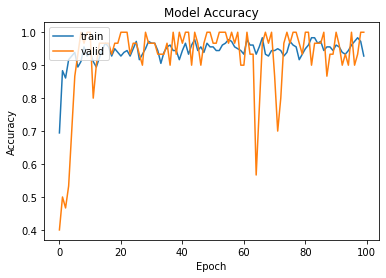

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# The Graph shows the learning Rate of accuracy increases

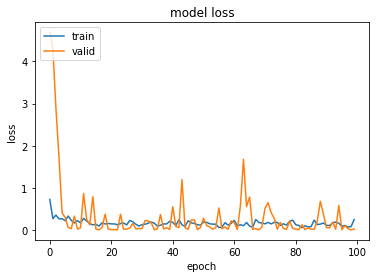

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# This shows the loss reduces as the accuracy increases

In [33]:
test_labels = test_batches.classes
test_batches.class_indices

{'0': 0, '1': 1}

In [34]:
#Step is divided by the total number of image by the batch sizes
predictions = model.predict_generator(test_batches, steps=275.4, verbose=0)

In [35]:
predictions.shape, test_labels.shape # to get the number of images and classes.

((2754, 2), (2754,))

In [36]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    '''
    This fuction would print and plot the confusion matrix.
    Nomalization can be addedby as normalize=True
    '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalize Confusion matrix")
    else:
        print("confusion matrix without normalization")
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color='white' if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Prediction Label')

In [37]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

confusion matrix without normalization
[[1271  106]
 [  36 1341]]


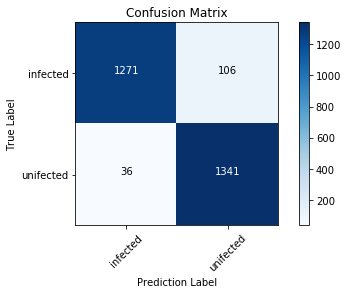

In [38]:
cm_plot_labels = ['infected','unifected']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [40]:
print( classification_report(test_labels, predictions.argmax(axis=1)))
print( accuracy_score(test_labels, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1377
           1       0.93      0.97      0.95      1377

    accuracy                           0.95      2754
   macro avg       0.95      0.95      0.95      2754
weighted avg       0.95      0.95      0.95      2754

0.9484386347131445


# AUC AND ROC

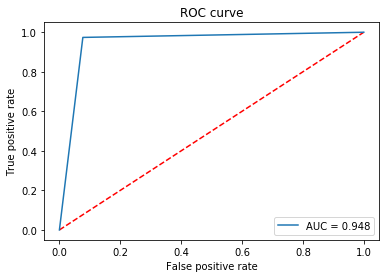

In [41]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
roc_log = roc_auc_score(test_labels, predictions.argmax(axis=1))
false_positive_rate, true_positive_rate, threshold = roc_curve(test_labels, predictions.argmax(axis=1))
area_under_curve = auc(false_positive_rate, true_positive_rate)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
#plt.savefig(ROC_PLOT_FILE, bbox_inches='tight')
plt.close()

# TEST THE MODEL

In [1]:
from keras.models import load_model
new_model = load_model('malaria_model_2.h5')
print("*Model Loaded!!!")

Using TensorFlow backend.


*Model Loaded!!!


In [2]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [3]:
import cv2
import numpy as np

In [4]:
def converter(value):
    if value == 0:
        return "Parastiized"
    else:
        return "Uninfected"